In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression 


In [17]:
raw_data=pd.read_csv('femalefertility.csv')
raw_data

,fertility rate,worker percent
0,3.71,28.33
1,3.59,28.72
2,3.48,29.18
3,3.37,29.67
4,3.27,30.17
5,3.17,30.66
6,3.07,31.02
7,2.97,31.40
8,2.88,31.77
9,2.78,32.13


In [18]:
raw_data.describe()

,fertility rate,worker percent
count,23.000000,23.000000
mean,2.711304,34.126957
std,0.526535,4.384630
min,2.060000,28.330000
25%,2.250000,30.840000
50%,2.600000,32.740000
75%,3.120000,37.195000
max,3.710000,44.040000


In [19]:
y=raw_data['fertility rate']
x1=raw_data['worker percent']

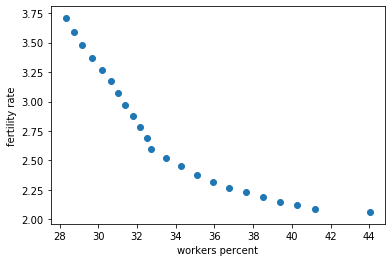

In [20]:
plt.scatter(x1,y)
plt.xlabel('workers percent')
plt.ylabel('fertility rate')
plt.show()

In [21]:
x=sm.add_constant(x1)
result=sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         fertility rate   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     117.2
Date:                Sat, 04 Jul 2020   Prob (F-statistic):           4.75e-10
Time:                        03:04:39   Log-Likelihood:                 4.2951
No. Observations:                  23   AIC:                            -4.590
Df Residuals:                      21   BIC:                            -2.319
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              6.4853      0.351     18.457      0.000       5.755       7.216
worker percent    -0.1106      0.010    -10.825      0.000      -0.132      -0.089
==============================================================================
Omnibus:                        1.646   Durbin-Watson:                   0.150
Prob(Omnibus):                  0.439   Jarque-Bera (JB):                1.439
Skew:                           0.500   Prob(JB):                        0.487
Kurtosis:                       2.292   Cond. No.                         276.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

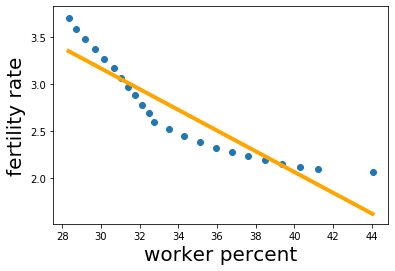

In [26]:
plt.scatter(x1,y)
yhat=6.4853+-0.1106*x1
fig=plt.plot(x1,yhat,lw=4,c='orange',label='regression line')
plt.xlabel('worker percent', fontsize=20)
plt.ylabel('fertility rate' ,fontsize=20)
plt.show()


In [27]:
a=raw_data['worker percent']


In [28]:
a.shape

(23,)

In [29]:
a_matrix=a.values.reshape(23,1)
a_matrix

array([[28.33],
       [28.72],
       [29.18],
       [29.67],
       [30.17],
       [30.66],
       [31.02],
       [31.4 ],
       [31.77],
       [32.13],
       [32.5 ],
       [32.74],
       [33.5 ],
       [34.29],
       [35.1 ],
       [35.94],
       [36.77],
       [37.62],
       [38.49],
       [39.38],
       [40.29],
       [41.21],
       [44.04]])

In [30]:
b=raw_data['fertility rate']

In [31]:
b.shape

(23,)

In [32]:
b_matrix=b.values.reshape(23,1)

In [33]:
b_matrix

array([[3.71],
       [3.59],
       [3.48],
       [3.37],
       [3.27],
       [3.17],
       [3.07],
       [2.97],
       [2.88],
       [2.78],
       [2.69],
       [2.6 ],
       [2.52],
       [2.45],
       [2.38],
       [2.32],
       [2.27],
       [2.23],
       [2.19],
       [2.15],
       [2.12],
       [2.09],
       [2.06]])

In [34]:
from sklearn.model_selection import train_test_split

In [36]:
a_matrix_train,a_matrix_test,b_matrix_train,b_matrix_test=train_test_split(a_matrix,b_matrix,test_size=.2,random_state=100)

In [37]:
reg=LinearRegression()
reg.fit(a_matrix_train,b_matrix_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
predictions=reg.predict(a_matrix_test)

In [45]:
predictions.shape

(5, 1)

In [46]:
b_matrix_train.shape

(18, 1)

In [47]:
a_matrix_test.shape

(5, 1)

In [48]:
b_matrix_test.shape

(5, 1)

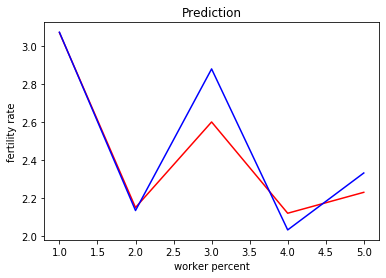

In [49]:
c = [i for i in range (1,len(b_matrix_test)+1,1)]
plt.plot(c,b_matrix_test,color='r',linestyle='-')
plt.plot(c,predictions,color='b',linestyle='-')
plt.xlabel('worker percent')
plt.ylabel('fertility rate')
plt.title('Prediction')
plt.show()